# <font color='bluegreen'> **Diagnóstico de Retinopatia Diabética com CNN**

## <font color='red'> **Situação Problema**

**Sobre o conjunto de dados:**\
A prevalência da Retinopatia Diabética é alarmantemente elevada, afetando uma proporção significativa de indivíduos com diabetes de longa data. A detecção precoce e o tratamento oportuno são cruciais para prevenir a perda de visão e melhorar os resultados dos pacientes. No entanto, a interpretação manual de imagens da retina para o rastreio da Retinopatia Diabética pode ser demorada e sujeita a erros humanos. Portanto, há uma necessidade premente de uma ferramenta automatizada e precisa que possa auxiliar os profissionais de saúde na classificação da gravidade da Retinopatia Diabética.
Os métodos existentes para detectar e classificar a Retinopatia Diabética baseiam-se frequentemente em avaliações subjectivas e extenso trabalho manual, levando a ineficiências e potenciais inconsistências no diagnóstico. Além disso, a crescente prevalência da diabetes e a disponibilidade limitada de oftalmologistas agravam ainda mais os desafios no rastreio e diagnóstico atempados. Portanto, há necessidade de desenvolver um sistema automatizado robusto e confiável que possa detectar e classificar com precisão a Retinopatia Diabética, permitindo intervenção precoce e planos de tratamento personalizados.

**Descrição de dados :**\
Este conjunto de dados consiste em uma grande coleção de imagens retinais de alta resolução capturadas sob várias condições de imagem. Um profissional médico avaliou a presença de Retinopatia Diabética em cada imagem e atribuiu uma classificação numa escala que varia entre 0 e 1, que corresponde às seguintes categorias:

<font color='red'> **Retinopatia Diabética ---> 0**\
<font color='lightgreen'> **Sem Retinopatia Diabética ---> 1**

## <font color='yellowgreen'> **Bibliotecas**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, MaxPooling2D, Flatten
from keras.layers import Input, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import Xception
import cv2
import os

In [24]:
# Configurações
sns.set(style='darkgrid')

## <font color='yellowgreen'> **Base de Dados**

In [25]:
path = '/content/drive/MyDrive/Visão Computacional/Datasets/diabetes.zip'

with zipfile.ZipFile(path, 'r') as f:
    f.extractall('')

## <font color='yellowgreen'> **Pré-Processamento**

In [5]:
gerador_treino = ImageDataGenerator(rescale=1./255, zoom_range=0.2, horizontal_flip=True,
                                   rotation_range=10, shear_range=0.2)

imagens_treino = gerador_treino.flow_from_directory('../data/external/dataset/train', target_size=(224,224),
                                                    class_mode='categorical', batch_size=32, shuffle=True)

Found 2076 images belonging to 2 classes.


In [6]:
gerador_val = ImageDataGenerator(rescale=1./255)

imagens_val = gerador_val.flow_from_directory('../data/external/dataset/valid', target_size=(224,224),
                                                    class_mode='categorical', batch_size=1, shuffle=False)

Found 531 images belonging to 2 classes.


## <font color='yellowgreen'> **Visualização dos Dados**

In [114]:
def show_images(path_img, path_img2):
    img = cv2.imread(path_img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2 = cv2.imread(path_img2)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    fig, axs = plt.subplots(1, 2, figsize=(8,4))

    plt.subplots_adjust(hspace=0.0001)
    axs[0].imshow(img)
    axs[0].set_title('Image without DR')
    axs[0].axis('off')

    axs[1].imshow(img2)
    axs[1].set_title('Image with DR')
    axs[1].axis('off')

    plt.show()

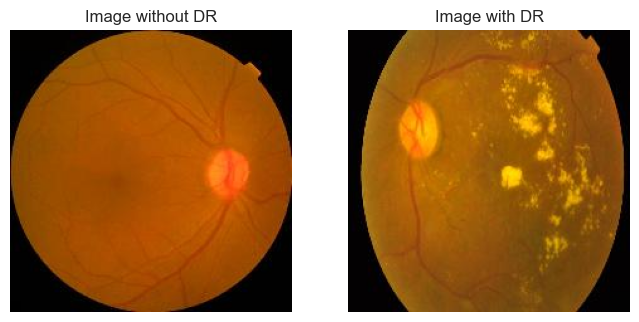

In [115]:
path1 = '../data/external/dataset/test/No_DR/03b373718013_png.rf.aeac7af7a221106fab6aaa133b5ecc3f.jpg'
path2 = '../data/external/dataset/test/DR/0104b032c141_png.rf.2b861f09f8526f5316cd44d8522bf62e.jpg'
show_images(path1, path2)

## <font color='yellowgreen'> **Rede Neural Convolucional<font color='red'> (loss: 0.1593 - accuracy: 0.9322)**

### <font color='yellowgreen'> **Estrutura da Rede neural**

In [7]:
network = Sequential()
network.add(Input(shape=(224, 224, 3)))

network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
network.add(MaxPooling2D(pool_size=(2,2)))
network.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units=2300, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(units=2300, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(units=2300, activation='relu'))
network.add(Dropout(0.2))
network.add(Dense(units=2, activation='softmax'))

network.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
network.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 32)      

### <font color='yellowgreen'> **Treinando o Modelo**

In [8]:
historico = network.fit(imagens_treino, epochs=15, validation_data=imagens_val)

Epoch 1/15


65/65 [==============================] - 80s 1s/step - loss: 0.8074 - accuracy: 0.6190 - val_loss: 0.4015 - val_accuracy: 0.8531
Epoch 2/15
65/65 [==============================] - 59s 907ms/step - loss: 0.4448 - accuracy: 0.7962 - val_loss: 0.2435 - val_accuracy: 0.9153
Epoch 3/15
65/65 [==============================] - 53s 819ms/step - loss: 0.3269 - accuracy: 0.8690 - val_loss: 0.2483 - val_accuracy: 0.9002
Epoch 4/15
65/65 [==============================] - 62s 959ms/step - loss: 0.3098 - accuracy: 0.8767 - val_loss: 0.2489 - val_accuracy: 0.8927
Epoch 5/15
65/65 [==============================] - 63s 969ms/step - loss: 0.2978 - accuracy: 0.8849 - val_loss: 0.2662 - val_accuracy: 0.8889
Epoch 6/15
65/65 [==============================] - 65s 1s/step - loss: 0.2629 - accuracy: 0.8907 - val_loss: 0.2005 - val_accuracy: 0.8983
Epoch 7/15
65/65 [==============================] - 63s 963ms/step - loss: 0.2469 - accuracy: 0.9075 - val_loss: 0.1798 - val_accuracy: 0.9247
Epo

### <font color='yellowgreen'> **Avaliando o Modelo**

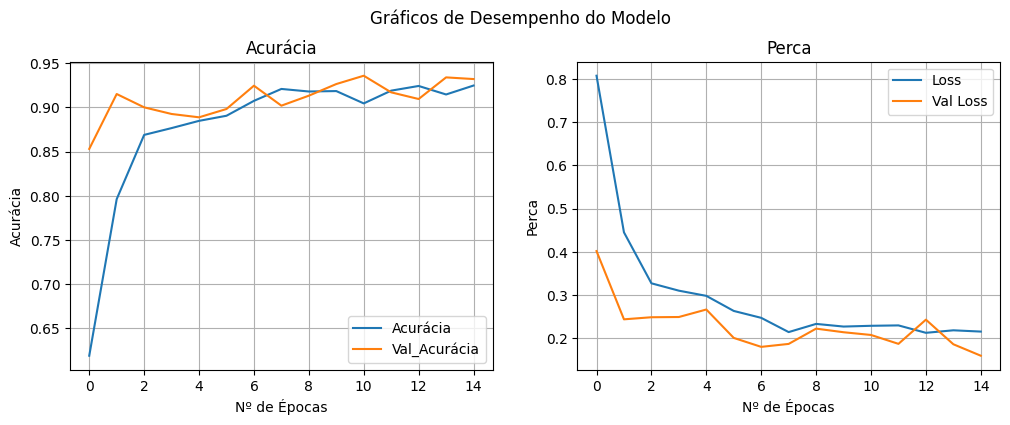

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

plt.suptitle('Gráficos de Desempenho do Modelo', y=1.01)
axs[0].plot(historico.history['accuracy'], label='Acurácia')
axs[0].plot(historico.history['val_accuracy'], label='Val_Acurácia')
axs[0].set_title('Acurácia')
axs[0].set_xlabel('Nº de Épocas')
axs[0].set_ylabel('Acurácia')
axs[0].grid()
axs[0].legend()

axs[1].plot(historico.history['loss'], label='Loss')
axs[1].plot(historico.history['val_loss'], label='Val Loss')
axs[1].set_title('Perca')
axs[1].set_xlabel('Nº de Épocas')
axs[1].set_ylabel('Perca')
axs[1].grid()
axs[1].legend()

plt.show()

In [11]:
loss , acuracia = network.evaluate(imagens_val)

acuracia

531/531 [==============================] - 8s 14ms/step - loss: 0.1593 - accuracy: 0.9322


0.9322034120559692

In [12]:
previsoes = network.predict(imagens_val)
previsoes = np.argmax(previsoes, axis=1)
previsoes

531/531 [==============================] - 8s 14ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [13]:
imagens_val.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       245
           1       0.91      0.97      0.94       286

    accuracy                           0.93       531
   macro avg       0.94      0.93      0.93       531
weighted avg       0.93      0.93      0.93       531



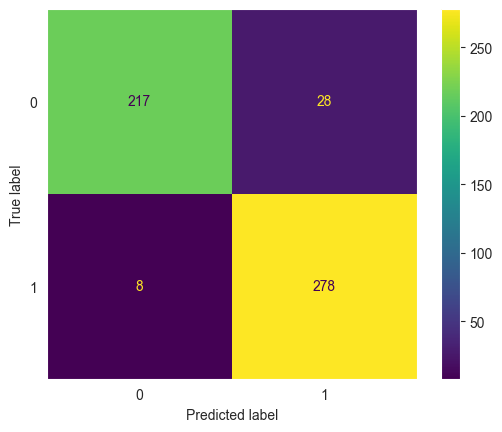

In [14]:
print(classification_report(imagens_val.classes, previsoes))
sns.set_style('dark')
ConfusionMatrixDisplay.from_predictions(imagens_val.classes, previsoes);

### <font color='yellowgreen'> **Testando o Modelo**

In [143]:
gerador_teste = ImageDataGenerator(1./255)

base_teste = gerador_teste.flow_from_directory('../data/external/dataset/test/', target_size=(224,224),
                                               class_mode='categorical', shuffle=False, batch_size=1)

Found 231 images belonging to 2 classes.


In [144]:
previsoes = network.predict(base_teste)
previsoes = np.argmax(previsoes, axis=1)
previsoes

  1/231 [..............................] - ETA: 21s

C:\Users\johnn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\preprocessing\image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


231/231 [==============================] - 4s 16ms/step


array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [145]:
base_teste.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       113
           1       0.89      0.98      0.94       118

    accuracy                           0.93       231
   macro avg       0.94      0.93      0.93       231
weighted avg       0.94      0.93      0.93       231



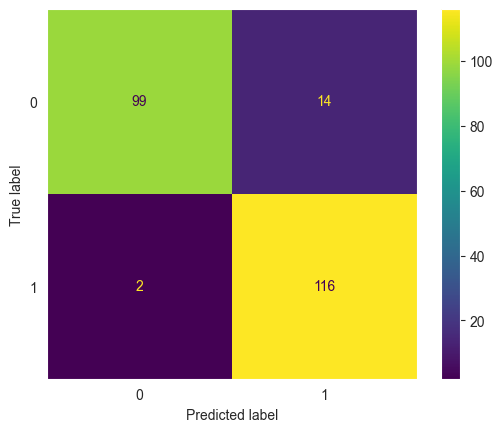

In [146]:
print(classification_report(base_teste.classes, previsoes))
sns.set_style('dark')
ConfusionMatrixDisplay.from_predictions(base_teste.classes, previsoes);

### <font color='yellowgreen'> **Salvando Modelo**

In [15]:
modelo_json = network.to_json()

with open('../src/models/classificador_093.json', 'w') as f:
    f.write(modelo_json)

In [111]:
network.save_weights('../src/models/weigths_classificador_0.93.h5')

________________________________________________________________________________________________________________________

## <font color='yellowgreen'> **Prevendo um Novo Valor**


In [181]:
from keras.models import model_from_json

In [182]:
with open('../src/models/model_093/classificador_093.json', 'r') as f:
    modelo = f.read()

classificador = model_from_json(modelo)
classificador.load_weights('../src/models/model_093/weigths_classificador_0.93.h5')
classificador.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [314]:
def prever_novo_valor(path_img, visualizar=False):
    img_orig = cv2.imread(path_img)
    img_orig = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
    img = img_orig / 255
    img = cv2.resize(img, (224,224))
    img = np.expand_dims(img, 0)
    
    previsao_novo_valor = classificador.predict(img, verbose=False)
    previsao_novo_valor = np.argmax(previsao_novo_valor, axis=1)[0]

    print(f'---'*18)
    print(f'Avaliação do Paciente'.center(50))
    print(f'---'*18)

    print('')
    if previsao_novo_valor == 0:
        print(f'Previsão: Paciente \033[31mCOM\033[0m Retinopatia Diabética')
        cv2.putText(img_orig, 'DR: Positive', (144,220), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 1)
    else:
        print(f'Previsão: Paciente \033[34mSEM\033[0m Retinopatia Diabética')
        cv2.putText(img_orig, 'DR: Negative', (140,220), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 1)

    if visualizar:
        plt.imshow(img_orig)
        plt.axis('off')
        plt.show()


------------------------------------------------------
              Avaliação do Paciente               
------------------------------------------------------

Previsão: Paciente COM Retinopatia Diabética


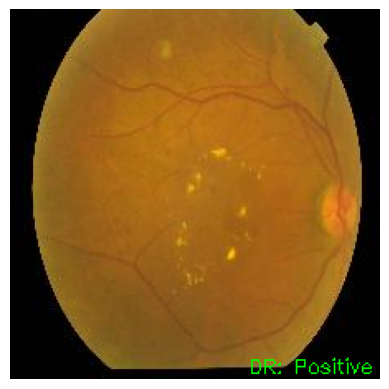

In [315]:
novo_valor = '../data/external/dataset/test/DR/fcc55ae641ae_png.rf.d98ddf7b390d71f7396e61dbdf741061.jpg'
prever_novo_valor(novo_valor, True)

------------------------------------------------------
              Avaliação do Paciente               
------------------------------------------------------

Previsão: Paciente SEM Retinopatia Diabética


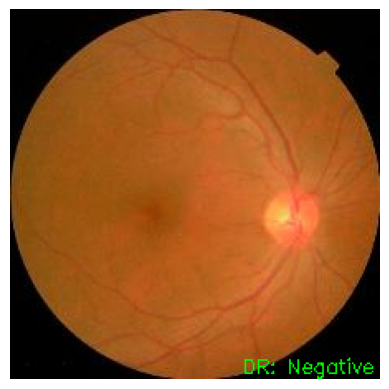

In [316]:
novo_valor = '../data/external/dataset/test/No_DR/11d8e5eaee5b_png.rf.14e5a404773634103b5f296dba4eddf9.jpg'
prever_novo_valor(novo_valor, True)

## <font color='yellowgreen'> **Transfer Learning <font color='red'>(loss: 1.4971 - accuracy: 0.8475)**

### <font color='yellowgreen'> **Estrutura**

In [44]:
resnet = Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
resnet.summary()

Exception ignored in: <function _xla_gc_callback at 0x7ab5d2c52b90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 101, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]

In [45]:
camada_densa = resnet.output
camada_densa = GlobalAveragePooling2D()(camada_densa)
camada_densa = Dense(units= 1025, activation='relu')(camada_densa)
camada_densa = Dropout(0.2)(camada_densa)
camada_densa = Dense(units= 1025, activation='relu')(camada_densa)
camada_densa = Dropout(0.2)(camada_densa)
camada_densa = Dense(units= 1025, activation='relu')(camada_densa)
camada_densa = Dropout(0.2)(camada_densa)
camada_densa_output = Dense(units= 2, activation='softmax')(camada_densa)

In [46]:
network_fine_tunning = Model(inputs= resnet.input, outputs= camada_densa_output)
network_fine_tunning.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_5[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'] 

### <font color='yellowgreen'> **Treinando Modelo**

In [53]:
network_fine_tunning.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resultados = network_fine_tunning.fit(imagens_treino, epochs= 15, validation_data= imagens_val)

Epoch 1/15
65/65 [==============================] - 85s 830ms/step - loss: 0.4052 - accuracy: 0.8367 - val_loss: 1.5042 - val_accuracy: 0.8267
Epoch 2/15
65/65 [==============================] - 47s 722ms/step - loss: 0.1694 - accuracy: 0.9485 - val_loss: 0.6835 - val_accuracy: 0.8004
Epoch 3/15
65/65 [==============================] - 46s 704ms/step - loss: 0.1313 - accuracy: 0.9619 - val_loss: 1.0392 - val_accuracy: 0.8719
Epoch 4/15
65/65 [==============================] - 47s 728ms/step - loss: 0.1096 - accuracy: 0.9668 - val_loss: 3.7660 - val_accuracy: 0.5348
Epoch 5/15
65/65 [==============================] - 47s 717ms/step - loss: 0.1051 - accuracy: 0.9677 - val_loss: 0.3366 - val_accuracy: 0.9529
Epoch 6/15
65/65 [==============================] - 51s 776ms/step - loss: 0.1240 - accuracy: 0.9639 - val_loss: 2.4554 - val_accuracy: 0.8324
Epoch 7/15
65/65 [==============================] - 51s 775ms/step - loss: 0.1103 - accuracy: 0.9658 - val_loss: 3.9802 - val_accuracy: 0.8475

### <font color='yellowgreen'> **Avaliando o Modelo**

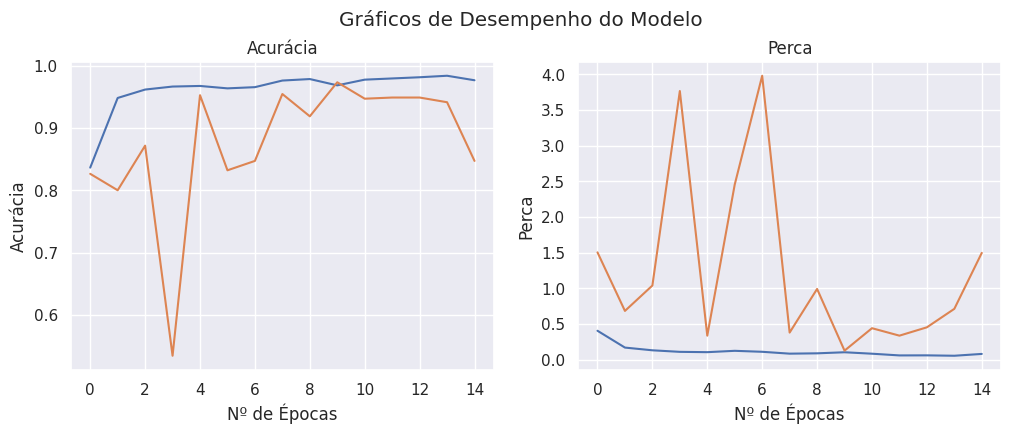

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(12,4))

plt.suptitle('Gráficos de Desempenho do Modelo', y=1.01)
axs[0].plot(resultados.history['accuracy'])
axs[0].plot(resultados.history['val_accuracy'])
axs[0].set_title('Acurácia')
axs[0].set_xlabel('Nº de Épocas')
axs[0].set_ylabel('Acurácia')

axs[1].plot(resultados.history['loss'])
axs[1].plot(resultados.history['val_loss'])
axs[1].set_title('Perca')
axs[1].set_xlabel('Nº de Épocas')
axs[1].set_ylabel('Perca')
plt.show()

In [57]:
previsoes_imagenet = network_fine_tunning.predict(imagens_val)
previsoes_imagenet = np.argmax(previsoes_imagenet, axis=1)

531/531 [==============================] - 7s 10ms/step


              precision    recall  f1-score   support

           0       1.00      0.67      0.80       245
           1       0.78      1.00      0.88       286

    accuracy                           0.85       531
   macro avg       0.89      0.83      0.84       531
weighted avg       0.88      0.85      0.84       531



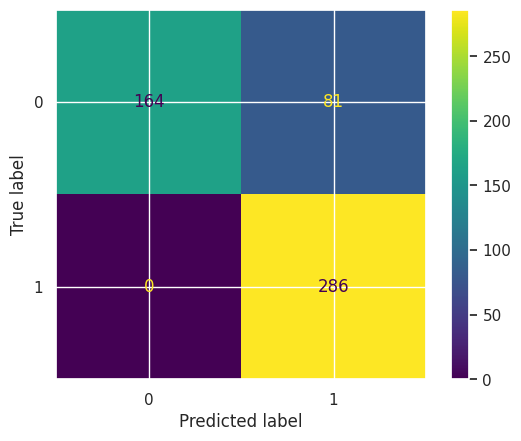

In [58]:
print(classification_report(imagens_val.classes, previsoes_imagenet))
sns.set_syle('dark')
ConfusionMatrixDisplay.from_predictions(imagens_val.classes, previsoes_imagenet);

In [60]:
loss, acc = network_fine_tunning.evaluate(imagens_val)

531/531 [==============================] - 7s 12ms/step - loss: 1.4971 - accuracy: 0.8475
